<a href="https://colab.research.google.com/github/GANDLASUMANTH/ML/blob/branch1/carona%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
 import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt  # Visualization 
import seaborn as sns

In [202]:
# Loading the covid-19 india date-wise record
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid_19_india.csv")

In [203]:
# Overviewing the data before modifications
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15806 entries, 0 to 15805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15806 non-null  int64 
 1   Date                      15806 non-null  object
 2   Time                      15806 non-null  object
 3   State/UnionTerritory      15806 non-null  object
 4   ConfirmedIndianNational   15806 non-null  object
 5   ConfirmedForeignNational  15806 non-null  object
 6   Cured                     15806 non-null  int64 
 7   Deaths                    15806 non-null  int64 
 8   Confirmed                 15806 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [205]:
# Checking for any null values
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [206]:
# Dropping the columns which are not going to be used

df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [207]:
#finding the active cases

df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [208]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [209]:
df.tail(3)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
15803,2021-06-08,Uttarakhand,313566,6731,334419,14122
15804,2021-06-08,Uttar Pradesh,1662069,21333,1699083,15681
15805,2021-06-08,West Bengal,1388771,16362,1432019,26886


In [210]:
df.shape

(15806, 6)

In [211]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli'], dtype=object)

In [212]:
len(df['State/UnionTerritory'].unique())

41

In [213]:
import datetime as datetime

In [214]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date',inplace=True)

Task: Predict the number of new cases each day from March 26th to April 30th when the country was under lockdown.

In [215]:
df.loc['2020-03-26':'2020-04-30'].sum()

State/UnionTerritory    Andaman and Nicobar IslandsAndhra PradeshBihar...
Cured                                                               75957
Deaths                                                              13414
Confirmed                                                          428441
Active_cases                                                       339070
dtype: object

In [216]:
#To analyze the active cases on daily basis, we need to resample the data on daily basis.

df_day=df['Active_cases'].resample('D').sum()

In [217]:
# After resampling we will be able to find the total number of active cases in India
df_day

Date
2020-01-30          1
2020-01-31          1
2020-02-01          2
2020-02-02          3
2020-02-03          3
               ...   
2021-06-04    1635993
2021-06-05    1555248
2021-06-06    1477799
2021-06-07    1401609
2021-06-08    1303702
Freq: D, Name: Active_cases, Length: 496, dtype: int64

In [218]:
# Number of active cases from March 26 to April 30

df_day.loc['2020-03-26':'2020-04-30']

Date
2020-03-26      634
2020-03-27      640
2020-03-28      810
2020-03-29      901
2020-03-30     1118
2020-03-31     1238
2020-04-01     1649
2020-04-02     1860
2020-04-03     2322
2020-04-04     2784
2020-04-05     3219
2020-04-06     3851
2020-04-07     4312
2020-04-08     4714
2020-04-09     5218
2020-04-10     6039
2020-04-11     6634
2020-04-12     7409
2020-04-13     8048
2020-04-14     9272
2020-04-15    10197
2020-04-16    10824
2020-04-17    11616
2020-04-18    12289
2020-04-19    13295
2020-04-20    14255
2020-04-21    15122
2020-04-22    15859
2020-04-23    16689
2020-04-24    17915
2020-04-25    18904
2020-04-26    19865
2020-04-27    20912
2020-04-28    21870
2020-04-29    22904
2020-04-30    23882
Freq: D, Name: Active_cases, dtype: int64

In [219]:
df_day.loc['2020-03-26':'2020-04-30'].sum()

339070

State wise analysis

In [220]:
median_states=df[df['State/UnionTerritory'].isin(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli'])]
median_states.groupby(by=['State/UnionTerritory']).median().style.bar(['Active_cases'])

,Cured,Deaths,Confirmed,Active_cases
State/UnionTerritory,,,,
Andaman and Nicobar Islands,4088.000000,59.000000,4324.500000,65.500000
Andhra Pradesh,764205.000000,6555.000000,802355.000000,6833.000000
Arunachal Pradesh,13419.500000,42.500000,15121.500000,201.000000
Assam,197805.500000,933.000000,207171.500000,3434.000000
Bihar,204643.000000,1072.500000,213909.000000,5114.000000
Cases being reassigned to states,0.000000,0.000000,6623.000000,6623.000000
Chandigarh,13279.000000,223.000000,14152.000000,586.000000
Chhattisgarh,156080.000000,1881.000000,179654.000000,7693.000000
Dadra and Nagar Haveli,10176.000000,4.000000,10361.000000,181.000000


Above data shows Maharastra has more number of active cases.

In [221]:
states=['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli']

In [222]:
count=[[]]
for j in states:
  mh_count=df[df['State/UnionTerritory']==j]
  daily=[]
  daily.append(0)
  for i in range(1, len(mh_count)):
    daily.append(mh_count['Confirmed'].iloc[i]-mh_count['Confirmed'].iloc[i-1])
  mh_count['Daily']=daily
  count.append(mh_count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [223]:
count=np.array(count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


visualization

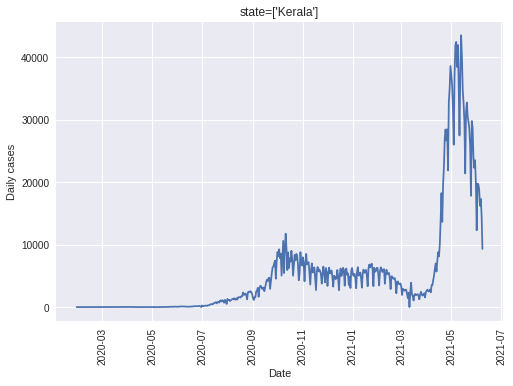

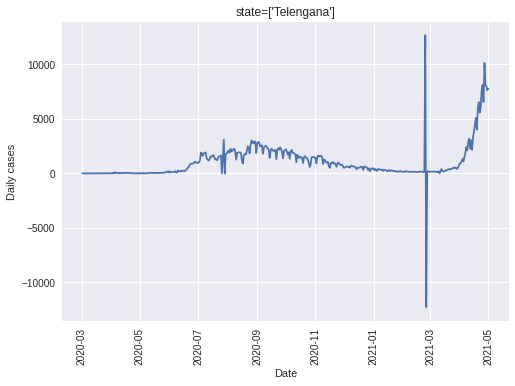

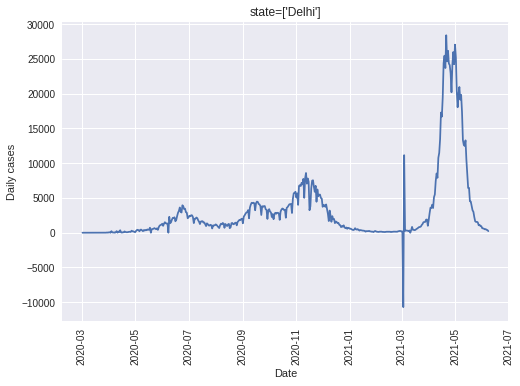

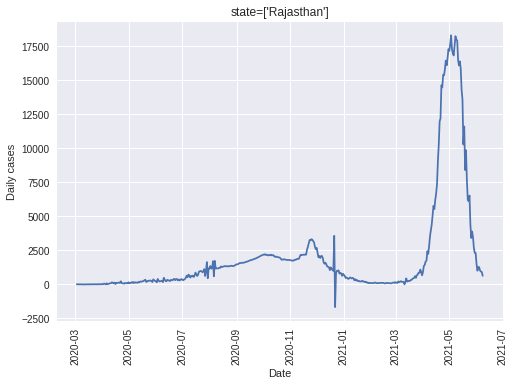

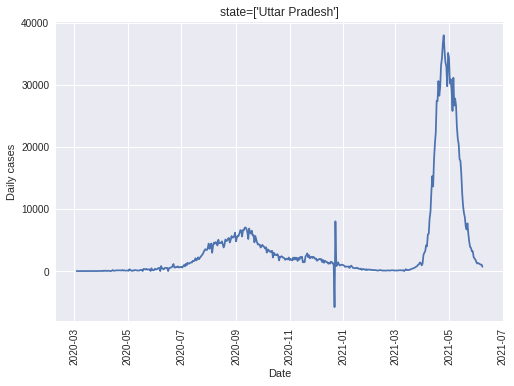

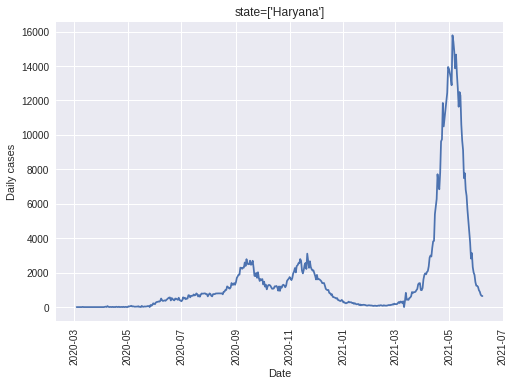

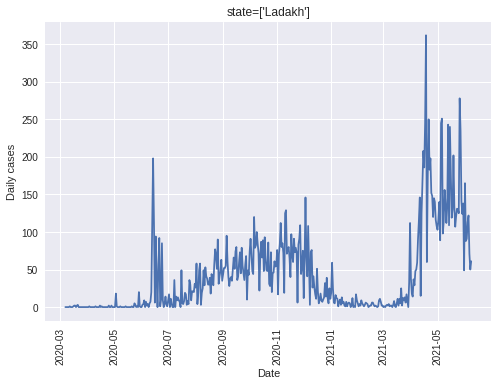

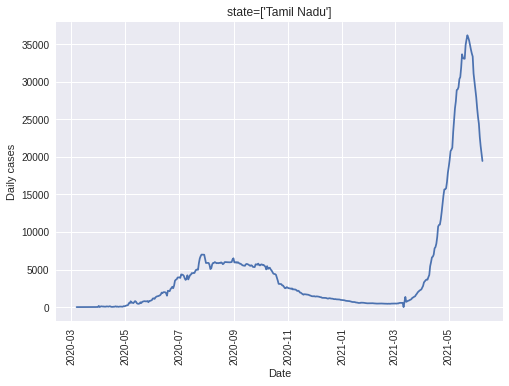

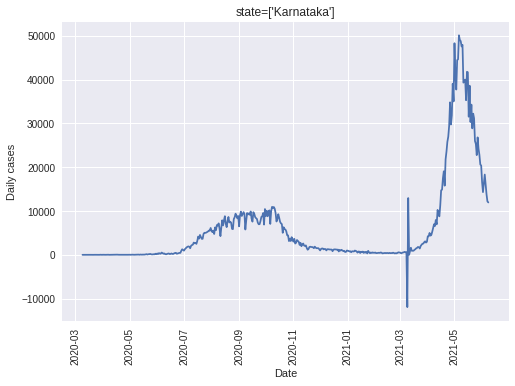

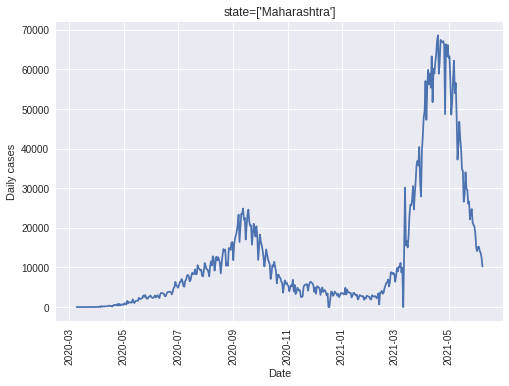

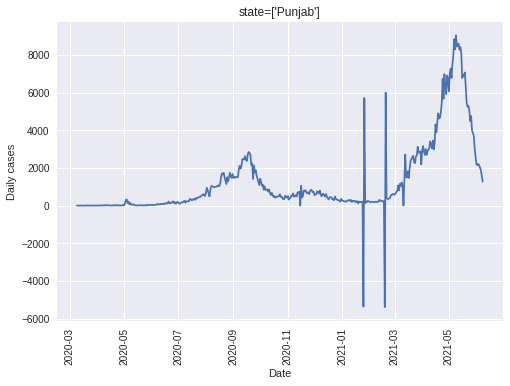

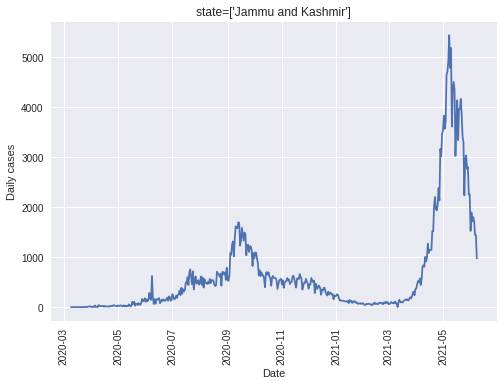

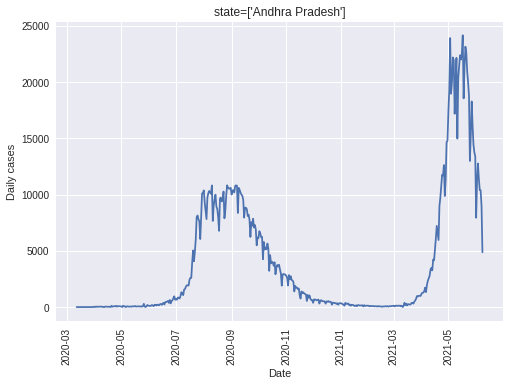

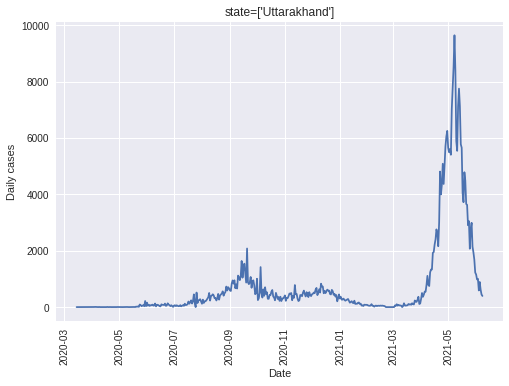

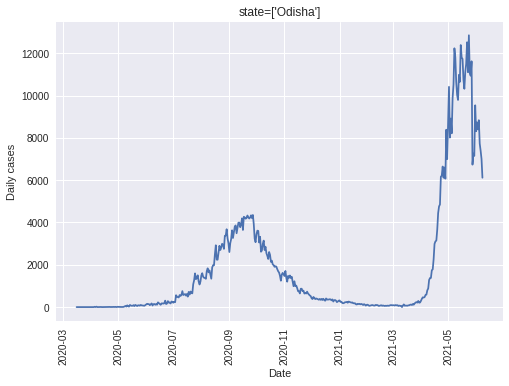

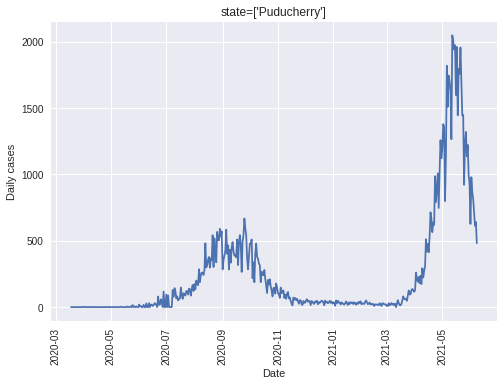

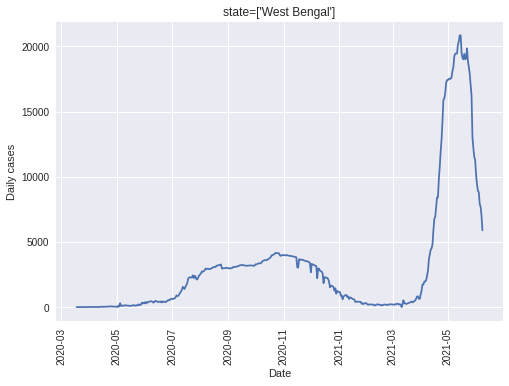

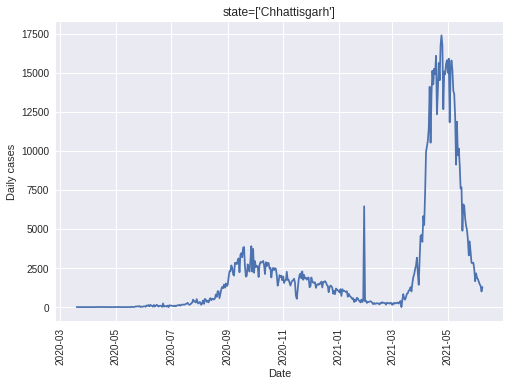

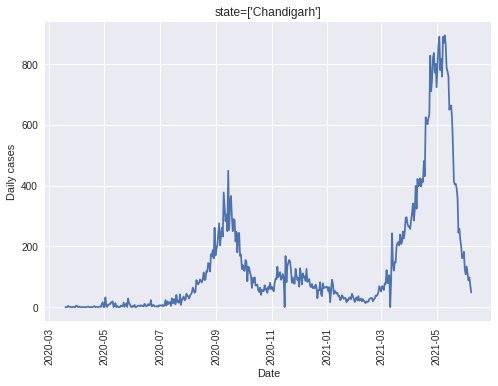

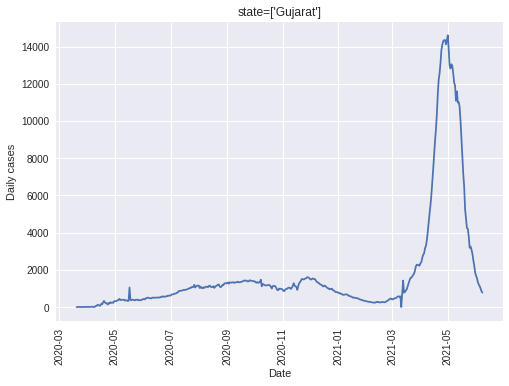

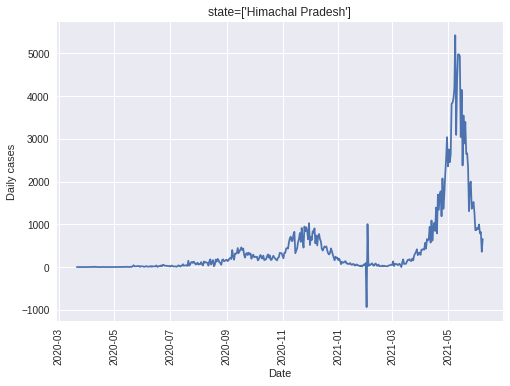

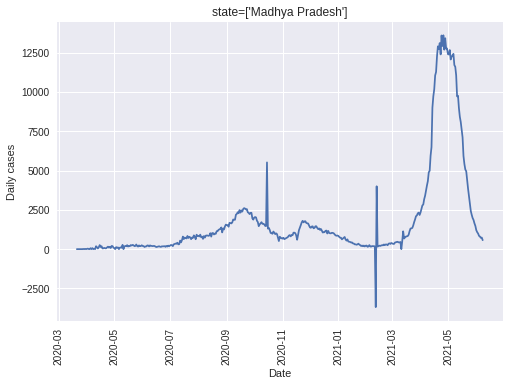

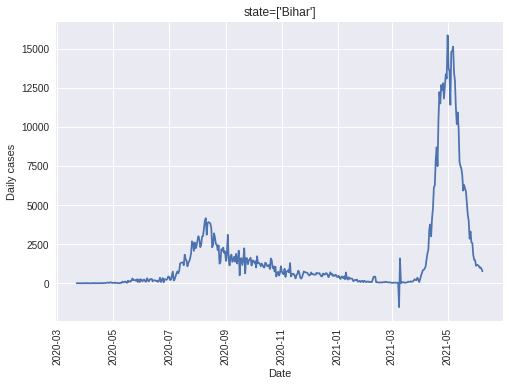

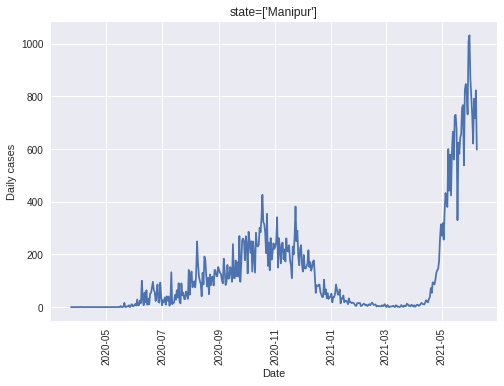

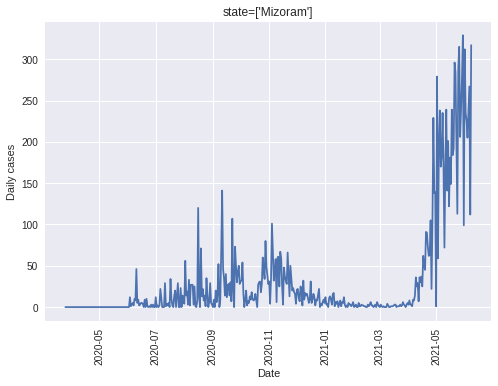

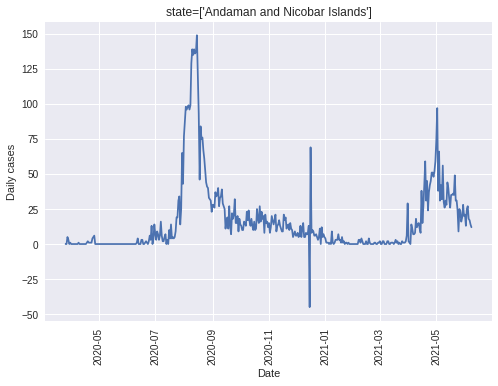

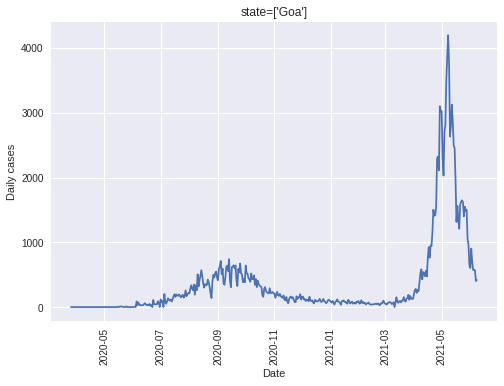

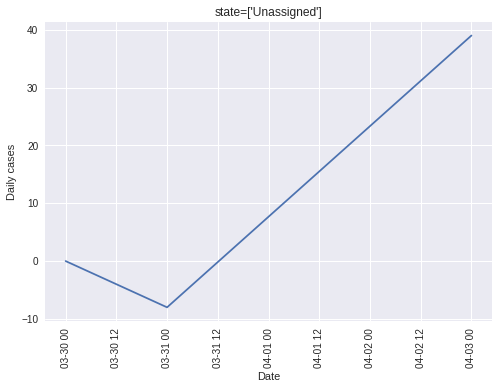

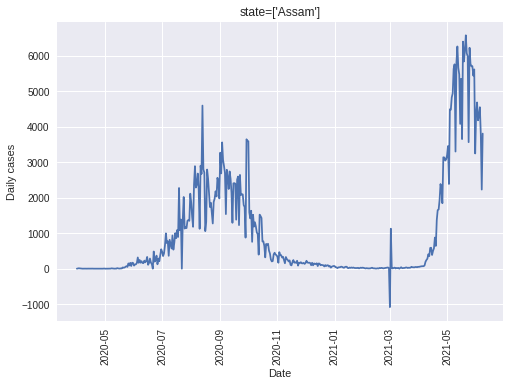

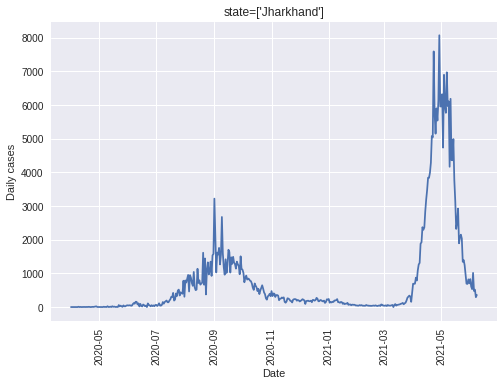

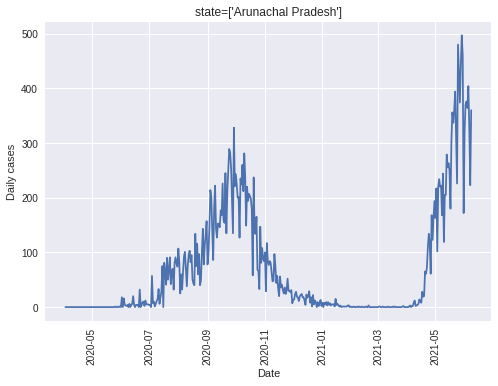

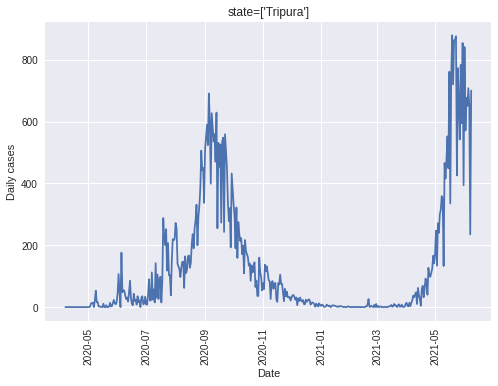

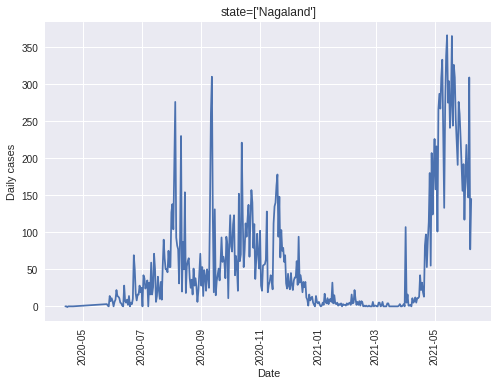

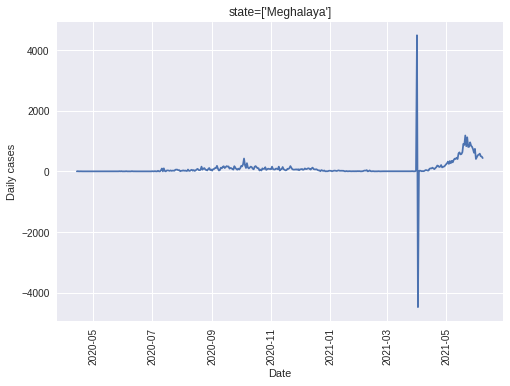

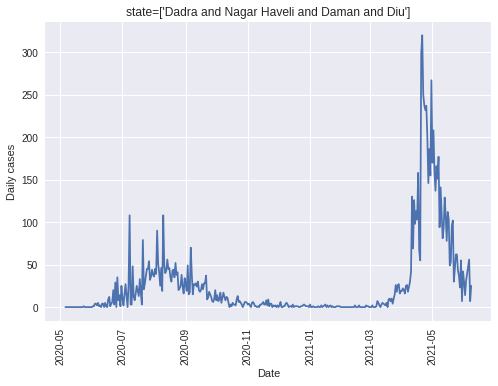

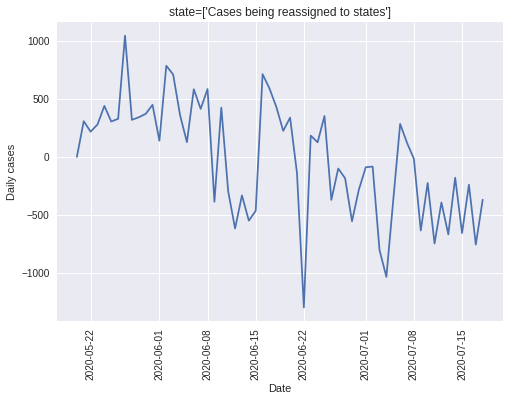

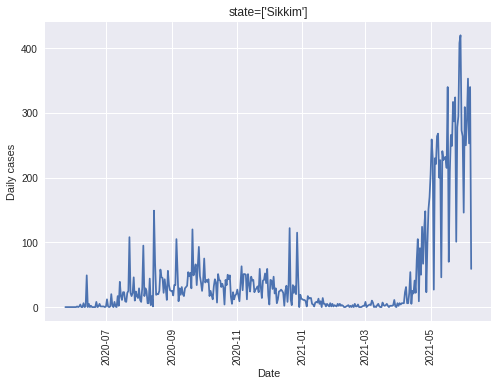

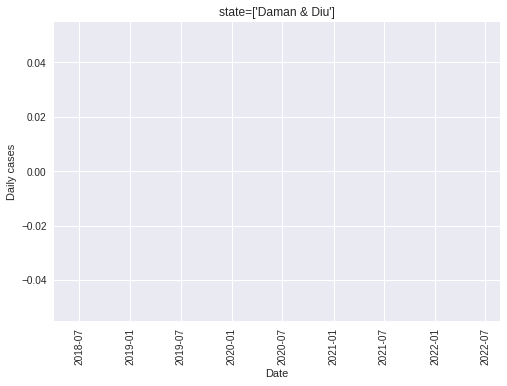

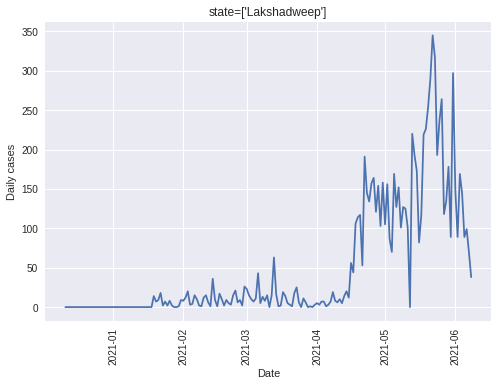

In [245]:
#State wise daily cases

for i in range(1,40):
 plt.title('state={}'.format(count[i]['State/UnionTerritory'].head(1).values))
 plt.xlabel('Date')
 plt.ylabel('Daily cases')
 plt.plot(count[i].index,count[i]['Daily'])
 plt.xticks(rotation='vertical')
 plt.show()

In [227]:
df1=df.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

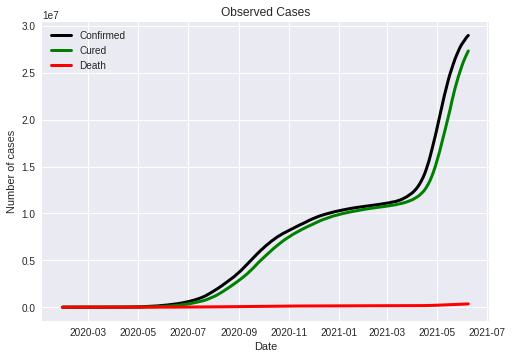

In [228]:
plt.title('Observed Cases')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.plot(df1.index,df1['Confirmed'],linewidth=3,label='Confirmed',color='black')
plt.plot(df1.index,df1['Cured'],linewidth=3,label='Cured',color='green')
plt.plot(df1.index,df1['Deaths'],linewidth=3,label='Death',color='red')
plt.legend()

Prediction

In [229]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split

In [230]:
lbl=LabelEncoder()
tree=DecisionTreeRegressor()
nb=GaussianNB()
linear=LinearRegression()
df['State/UnionTerritory']=lbl.fit_transform(df['State/UnionTerritory'])

In [231]:
x=df[['State/UnionTerritory','Cured','Deaths']]
y=df['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [232]:
tree.fit(x_train,y_train)
linear.fit(x_train,y_train)
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [233]:
from sklearn.metrics import r2_score
prediction1=tree.predict(x_test)
score1=r2_score(y_test,prediction1)
score1

0.9992695983057385

In [234]:
prediction2=linear.predict(x_test)
score2=r2_score(y_test,prediction2)
score2

0.9930121239063037

In [235]:
prediction3=nb.predict(x_test)
score3=r2_score(y_test,prediction3)
score3

0.5944440698308017

<BarContainer object of 3 artists>

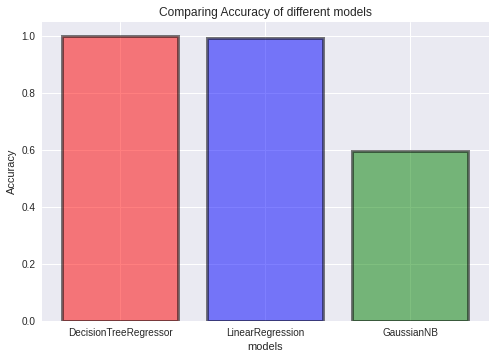

In [236]:
scores=[score1,score2,score3]
models=['DecisionTreeRegressor','LinearRegression','GaussianNB']
plt.title('Comparing Accuracy of different models')
plt.xlabel('models')
plt.ylabel('Accuracy')
plt.bar(models,scores,color=['red','blue','green'],alpha=0.5,linewidth=3,edgecolor='black')

Both LinearRegression and DecisionTreeRegressor models gave 99.3% Accuracy 